# YouTube Watching Patterns Analysis (2023 vs. 2024)

## Introduction

This project analyzes personal YouTube watch history data to compare viewing patterns in 2023 and 2024. 
By exploring this dataset, we aim to uncover insights into:

- **Temporal Trends**: Differences in viewing activity by time of day, day of the week, and month between the two years.
- **Content Preferences**: Shifts in the types of videos watched, including channels.
- **Engagement Patterns**: Changes in binge-watching behavior and diversity of content consumed.

### **Dataset**
- **Source**: Google Takeout YouTube watch history export.
- **Time Range**: February 14, 2023, to the present.
- **Fields Extracted**:
  - Timestamps: Date and time of each video watched.
  - Titles and URLs: Metadata for video classification.
  - Channel Names: Creators of the videos.

### **Research Question**
How have my YouTube watching patterns evolved between 2023 and 2024 in terms of temporal habits, content preferences, and engagement trends?

---

## Setup

Below are the necessary imports and setup steps for the project.



In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from collections import Counter
import re
import os

PROJECT_ROOT = "D:/CS210-Project"
os.chdir(PROJECT_ROOT)



# Create directories at the root level
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("notebook", exist_ok=True)
os.makedirs("visualizations", exist_ok=True)

# Define paths for reference
DATA_DIR_RAW = os.path.join(PROJECT_ROOT, "data/raw/")
DATA_DIR_PROCESSED = os.path.join(PROJECT_ROOT, "data/processed/")
VISUAL_DIR = os.path.join(PROJECT_ROOT, "visualizations/")



print("Current Working Directory:", os.getcwd())


Current Working Directory: D:\CS210-Project


## **Data Loading and Cleaning**

### **Objective**
To prepare the raw YouTube watch history data for analysis, we extract relevant fields, handle missing values, and generate additional attributes for a detailed exploration.

### **Steps**
1. **Load JSON Data**: Read the exported YouTube watch history JSON file (`izleme_gecmisi.json`).
2. **Extract Relevant Fields**:
   - **Timestamp**: The date and time the video was watched.
   - **Title**: The video's title, defaulting to "Unknown Title" if unavailable.
   - **Channel Name**: The creator of the video, defaulting to "Unknown Channel" if unavailable.
   - **URL**: The link to the video (if available).
3. **Derived Attributes**:
   - **Year, Month, Day, Hour, Week**: Temporal attributes for analyzing trends.
   - **Is Weekend**: A boolean flag to separate weekend activity.
   - **Is Missing Title**: Indicates whether the title is missing.
4. **Data Filtering**:
   - Drop rows with missing timestamps.
   - Keep data only from the years 2023 and 2024.
   - Remove duplicate entries based on `Timestamp`, `Title`, `Channel Name`, and `URL`.

---

In [18]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind


# Load raw JSON data
raw_json_path = os.path.join(DATA_DIR_RAW, "izleme_gecmisi.json")
with open(raw_json_path, "r", encoding="utf-8") as file:
    watch_history = json.load(file)

# Extract relevant data
data = []
for entry in watch_history:
    timestamp = pd.to_datetime(entry.get("time"), errors="coerce")
    title = entry.get("title", "Unknown Title")
    channel = (
        entry.get("subtitles", [{}])[0].get("name", "Unknown Channel")
        if entry.get("subtitles")
        else "Unknown Channel"
    )
    url = entry.get("titleUrl", None)
    data.append([timestamp, title, channel, url])

# Create DataFrame
columns = ["Timestamp", "Title", "Channel Name", "URL"]
youtube_df = pd.DataFrame(data, columns=columns)

# Clean and process data
youtube_df["Year"] = youtube_df["Timestamp"].dt.year
youtube_df["Month"] = youtube_df["Timestamp"].dt.month_name()
youtube_df["Day"] = youtube_df["Timestamp"].dt.day_name()
youtube_df["Hour"] = youtube_df["Timestamp"].dt.hour
youtube_df["Week"] = youtube_df["Timestamp"].dt.isocalendar().week
youtube_df["Is Weekend"] = youtube_df["Day"].isin(["Saturday", "Sunday"])
youtube_df["Is Missing Title"] = youtube_df["Title"].eq("Unknown Title")
youtube_df["Channel Name"] = youtube_df["Channel Name"].str.strip().str.title()

# Filter for relevant years
youtube_df = youtube_df.dropna(subset=["Timestamp"])
youtube_df = youtube_df[youtube_df["Year"].isin([2023, 2024])]

# Remove duplicates
youtube_df = youtube_df.drop_duplicates(subset=["Timestamp", "Title", "Channel Name", "URL"])

# Save cleaned data
processed_csv_path = os.path.join(DATA_DIR_PROCESSED, "youtube_cleaned.csv")
youtube_df.to_csv(processed_csv_path, index=False)
print(f"Cleaned data saved to {processed_csv_path}")


Cleaned data saved to D:/CS210-Project\data/processed/youtube_cleaned.csv


### Total Videos Watched by Year

This graph compares the total number of videos I watched in 2023 and 2024. In 2023, I watched **29,974 videos**, while in 2024, this number significantly dropped to **17,666 videos**. 

The primary reason for this decline is my transition from using YouTube as a primary music streaming platform to **Spotify** in 2024. In 2023, a substantial portion of my YouTube usage was dedicated to listening to music, which explains the higher number of videos watched. 

This shift to Spotify likely reflects a conscious effort to diversify my platform usage or to streamline my music consumption habits. Other potential contributing factors could include changes in my content preferences, time spent on alternative platforms, or lifestyle adjustments. 

This analysis provides valuable insight into how my digital habits have evolved between these two years, offering a clear example of how platform usage can impact overall trends.


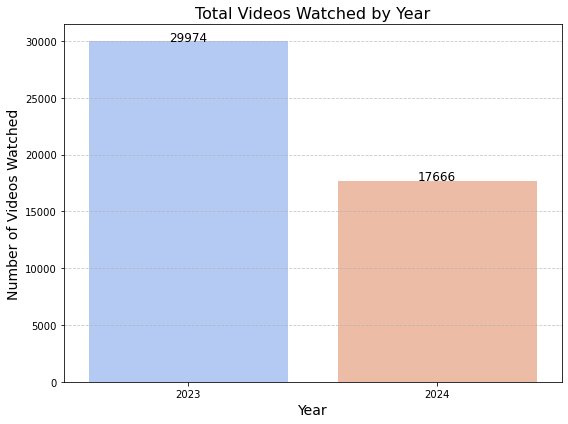

In [19]:
# Group by Year
yearly_counts = youtube_df.groupby("Year")["Title"].count()

# Plot Yearly Counts
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="coolwarm")
plt.title("Total Videos Watched by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Videos Watched", fontsize=14)
for i, value in enumerate(yearly_counts.values):
    plt.text(i, value + 50, f"{value}", ha="center", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "yearly_watch_counts.png"))
plt.show()


### Daily Viewing Patterns Over Time

This visualization showcases my YouTube daily viewing patterns from 2023 to 2024. The graph reveals clear fluctuations in daily video consumption, with distinct peaks and valleys over time.

Some key observations include:
- **2023** shows higher peaks, especially during mid-year, likely reflecting periods of high engagement or binge-watching sessions. 
- **2024** demonstrates a noticeable decline in daily activity. The spikes are less frequent and less pronounced, aligning with my transition from YouTube to Spotify for music consumption.

- Although general patterns look similar, in 2024 summer i completed my mandatory internship and had less free time, which is reflected in the lower peaks.

This trend further emphasizes the shift in my platform usage and highlights how external factors, such as changes in habits or life circumstances, influence daily engagement levels.


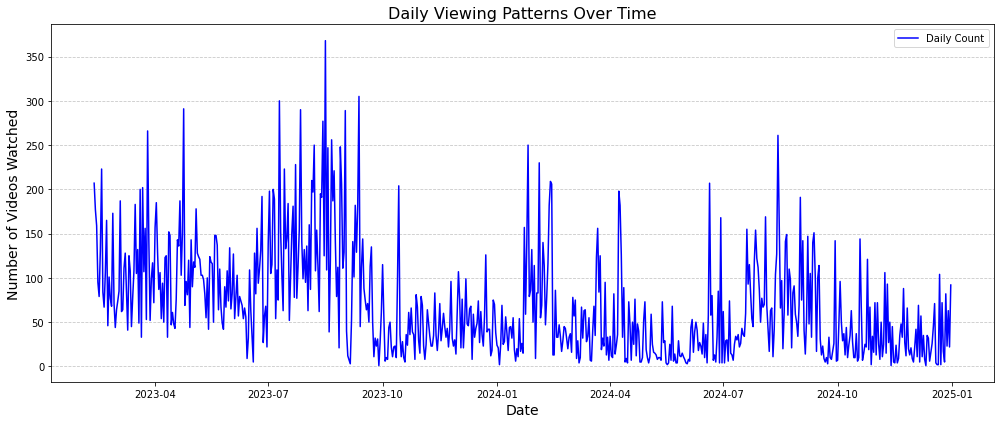

In [20]:
# Daily Trends
daily_trends = youtube_df.groupby(youtube_df["Timestamp"].dt.date)["Title"].count()

# Plot Daily Trends
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_trends.index, y=daily_trends.values, color="blue", label="Daily Count")
plt.title("Daily Viewing Patterns Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Videos Watched", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "daily_trends.png"))
plt.show()


### Hourly Viewing Trends (2023 vs 2024)

This bar chart compares my YouTube viewing habits at different hours of the day in 2023 and 2024. Each bar represents the total number of videos watched in a given hour, split by year for comparison.

Key insights from the visualization:
- **Peak Hours**: In both years, the highest activity occurs in the evening (7 PM to 10 PM). This aligns with my daily routine, as evenings are typically more relaxed and offer free time for entertainment or learning.
- **Lower Engagement**: Minimal viewing occurs in the early morning hours (12 AM to 6 AM), which reflects typical sleeping hours.
- **Differences Between Years**:
  - In **2023**, the peak viewing hours are more pronounced, likely due to increased engagement with YouTube for both music and video content.
  - In **2024**, the activity levels are generally lower across all hours, aligning with the shift to other platforms like Spotify for music.

This analysis highlights how my YouTube usage patterns are tied to daily routines and how my overall engagement has decreased over time.


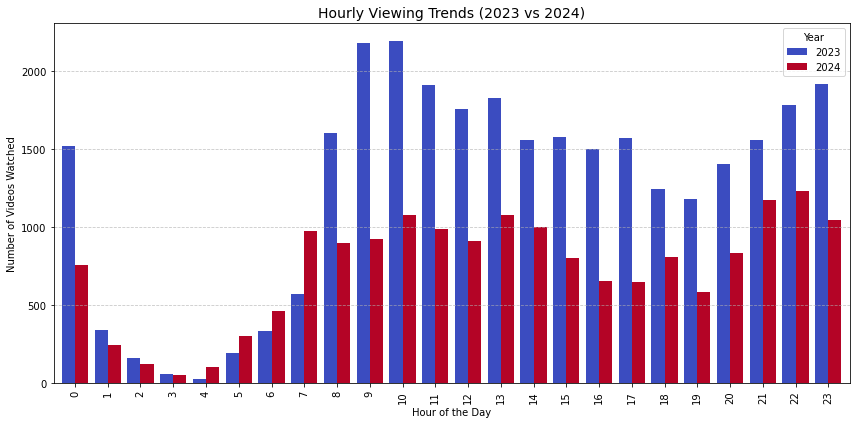

In [21]:
hourly_counts = youtube_df.groupby(["Hour", "Year"])["Title"].count().unstack()

hourly_counts.plot(kind="bar", figsize=(12, 6), width=0.8, colormap="coolwarm")
plt.title("Hourly Viewing Trends (2023 vs 2024)", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Videos Watched")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "hourly_trends_yearly.png"))
plt.show()


### Monthly Viewing Trends (2023 vs 2024)

This bar chart provides a comparative view of my monthly YouTube activity in 2023 and 2024. Each month is represented by two bars, showing the number of videos watched in 2023 (blue) and 2024 (red).

#### Key Observations:
- **Peak Months**: 
  - In **2023**, August stands out as the peak month with 4,923 videos watched. This spike could be attributed to summer vacation and increased free time.
  - In **2024**, the highest activity is seen in August again, with 2,570 videos, though significantly lower compared to 2023 due to the internship.
- **Seasonal Trends**:
  - Both years exhibit a decline in activity during the later months (October to December),  due to academic/work assignments.
  - The early months (January to March) show steady but moderate activity in both years since it includes the mid-term break.
- **Comparison**:
  - Across almost all months, 2023 shows higher activity levels, reflecting greater engagement with YouTube.
  - The transition to other platforms for music consumption, such as Spotify, could explain the decline in 2024.

This visualization highlights the impact of seasonal and behavioral factors on my YouTube usage over time.


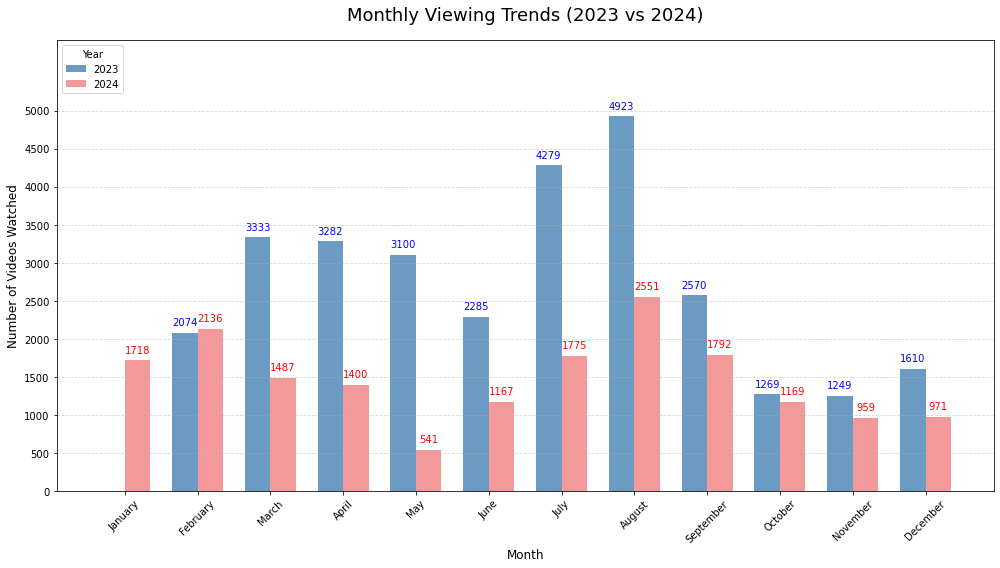

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate monthly counts
monthly_counts = (
    youtube_df.groupby(["Month", "Year"])["Title"].count().unstack(fill_value=0)
)

# Reindex months to ensure correct order
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_counts = monthly_counts.reindex(months_order)

# Define the bar width and spacing
bar_width = 0.35

# Calculate x positions for the bars
x = range(len(monthly_counts.index))

# Initialize the figure
plt.figure(figsize=(14, 8))

# Plot bars for 2023 and 2024 with spacing
plt.bar(
    [i - bar_width / 2 for i in x],
    monthly_counts[2023],
    width=bar_width,
    label="2023",
    color="steelblue",
    alpha=0.8
)
plt.bar(
    [i + bar_width / 2 for i in x],
    monthly_counts[2024],
    width=bar_width,
    label="2024",
    color="lightcoral",
    alpha=0.8
)

# Annotate bar heights
for i, (value_2023, value_2024) in enumerate(zip(monthly_counts[2023], monthly_counts[2024])):
    # Annotate values for 2023
    if value_2023 > 0:
        plt.text(
            i - bar_width / 2,
            value_2023 + 100,  # Place above the bar
            f"{int(value_2023)}",
            ha="center",
            fontsize=10,
            color="blue"
        )
    # Annotate values for 2024
    if value_2024 > 0:
        plt.text(
            i + bar_width / 2,
            value_2024 + 100,  # Place above the bar
            f"{int(value_2024)}",
            ha="center",
            fontsize=10,
            color="red"
        )

# Customize the plot
plt.title("Monthly Viewing Trends (2023 vs 2024)", fontsize=18, pad=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Videos Watched", fontsize=12)
plt.xticks(x, monthly_counts.index, rotation=45, fontsize=10)
plt.yticks(range(0, monthly_counts.max().max() + 500, 500))  # Set consistent y-axis intervals
plt.ylim(0, monthly_counts.max().max() + 1000)  # Add some extra space above the highest bar for annotations
plt.legend(title="Year", fontsize=10, loc="upper left")  # Place legend inside the plot
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Save and display the plot
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "monthly_trends_with_numbers.png"))
plt.show()


### Weekend vs Weekday Proportion (2023 vs 2024)

These pie charts provide a breakdown of my YouTube viewing activity by weekdays and weekends for 2023 and 2024. 

#### Key Observations:
- **2023**:
  - **Weekdays** account for **69.9%** of the total viewing activity.
  - **Weekends** contribute to **30.1%**, indicating slightly less engagement during leisure days.
- **2024**:
  - The proportions are similar, with **69.4%** of activity on weekdays and **30.6%** on weekends.
  - The slight increase in weekend activity could indicate the increased relaxation during weekends due to decreased responsibility in weekends.

#### Interpretation:
- The dominant weekday engagement suggests that I use YouTube as part of my routine during work or school days.
- Weekends remain relatively consistent between years, possibly reflecting consistent habits or relaxation patterns.

These insights reveal that my YouTube viewing is influenced more by structured routines than leisure time.


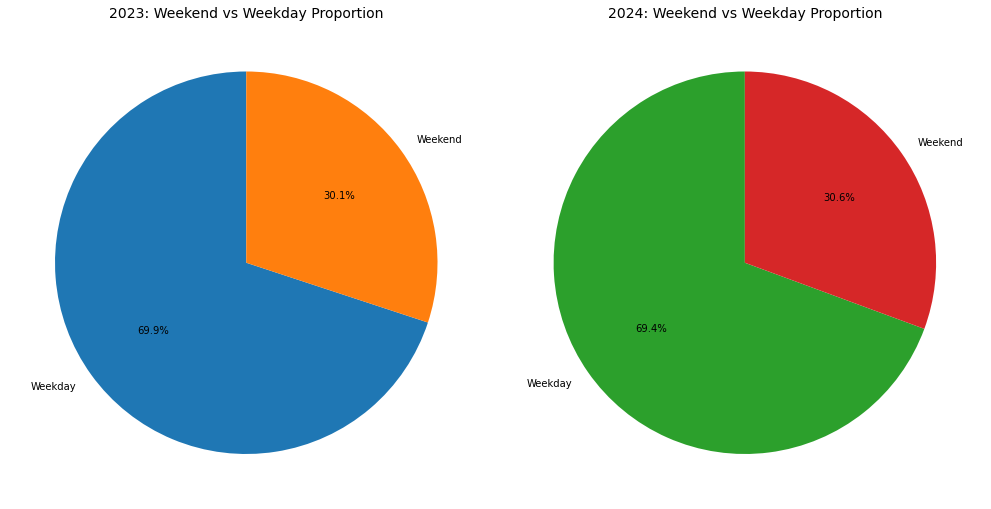

In [23]:
# Group data by Year and Is Weekend to calculate counts
weekend_weekday = youtube_df.groupby(["Year", "Is Weekend"])["Title"].count().unstack()

# Calculate proportions for 2023 and 2024
weekend_weekday_proportions = weekend_weekday.div(weekend_weekday.sum(axis=1), axis=0) * 100

# Plot pie charts with white background
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor="white")  # Set figure background to white

# Pie chart for 2023
axes[0].pie(
    weekend_weekday_proportions.loc[2023],
    labels=["Weekday", "Weekend"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#1f77b4", "#ff7f0e"],
)
axes[0].set_title("2023: Weekend vs Weekday Proportion", fontsize=14)

# Pie chart for 2024
axes[1].pie(
    weekend_weekday_proportions.loc[2024],
    labels=["Weekday", "Weekend"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#2ca02c", "#d62728"],
)
axes[1].set_title("2024: Weekend vs Weekday Proportion", fontsize=14)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "weekend_weekday_pie_white.png"), facecolor="white")  # Save with white background
plt.show()


### Binge-Watching Behavior Analysis (2023 vs 2024)

#### Definition:
Binge-watching sessions are defined as watching at least 3 videos within a 60-minute time window. This analysis identifies the total number of binge-watching sessions and the average session length (number of videos watched per session).

---

#### Statistics:
- **2023**:
  - **Total Sessions**: 1,058
  - **Average Session Length**: 27.93 videos per session
- **2024**:
  - **Total Sessions**: 925
  - **Average Session Length**: 18.37 videos per session

---

#### Observations:
1. **Total Sessions**:
   - There was a **12.6% decrease** in binge-watching sessions in 2024 compared to 2023.
   - This reduction suggests a significant behavioral shift, possibly reflecting less engagement or a move toward more structured or diversified content consumption.

2. **Average Session Length**:
   - The average session length in 2024 dropped by approximately **9.56 videos** compared to 2023, which is a **34% reduction**.
   - This trend suggests shorter, more frequent sessions instead of extended binge-watching episodes.

---

#### Interpretation:
The decline in binge-watching behavior aligns with broader patterns observed in the dataset, such as a decrease in overall video consumption in 2024. Explanations for this change include:
- A shift in content preferences (e.g., replacing YouTube with other platforms like Spotify).
- A change in daily routines, leaving less time for prolonged video-watching sessions.
- A conscious effort to reduce excessive screen time to improve productability by watching less reels videos in Youtube.

These findings highlight an evolving relationship with YouTube content, emphasizing a shift away from heavy, uninterrupted consumption toward more balanced or purposeful usage.


In [24]:
def detect_binge_sessions(df, time_window=60, min_videos=3):
    """
    Detect binge-watching sessions, defined as watching at least `min_videos` videos
    within a `time_window` minute interval.
    
    Returns:
        - List of binge session lengths
        - Total number of sessions
        - Average session length
    """
    df = df.sort_values("Timestamp").reset_index(drop=True)
    sessions = []
    current_session = [df.iloc[0]["Timestamp"]]

    for i in range(1, len(df)):
        time_diff = (df.iloc[i]["Timestamp"] - current_session[-1]).seconds / 60
        if time_diff <= time_window:
            current_session.append(df.iloc[i]["Timestamp"])
        else:
            if len(current_session) >= min_videos:
                sessions.append(len(current_session))
            current_session = [df.iloc[i]["Timestamp"]]

    if len(current_session) >= min_videos:
        sessions.append(len(current_session))
    
    return {
        "session_lengths": sessions,
        "total_sessions": len(sessions),
        "average_session_length": np.mean(sessions) if sessions else 0,
    }
# Detect binge sessions by year
binge_2023 = detect_binge_sessions(youtube_df[youtube_df["Year"] == 2023])
binge_2024 = detect_binge_sessions(youtube_df[youtube_df["Year"] == 2024])

# Print summary statistics
print("Binge-Watching Statistics (2023):")
print(f"Total Sessions: {binge_2023['total_sessions']}")
print(f"Average Session Length: {binge_2023['average_session_length']:.2f} videos")

print("\nBinge-Watching Statistics (2024):")
print(f"Total Sessions: {binge_2024['total_sessions']}")
print(f"Average Session Length: {binge_2024['average_session_length']:.2f} videos")


Binge-Watching Statistics (2023):
Total Sessions: 1058
Average Session Length: 27.93 videos

Binge-Watching Statistics (2024):
Total Sessions: 925
Average Session Length: 18.37 videos


### Enhanced Binge-Watching Session Length Distribution (2023 vs 2024)

#### Visualization Details:
This enhanced plot showcases the distribution of binge-watching session lengths for 2023 and 2024. The histogram highlights the frequency of sessions with varying lengths, while the overlaid Kernel Density Estimation (KDE) curves provide a smooth representation of the distribution trends for each year.

- **Histogram**: Bars represent the frequency of sessions with a specific number of videos.
- **KDE Curves**: The dashed lines illustrate the density trends, with blue representing 2023 and red for 2024.
- **Mean Lines**: Vertical dashed lines indicate the average session lengths for both years.

---

#### Observations:
1. **Distribution Patterns**:
   - Both years exhibit a highly skewed distribution, with most sessions having fewer videos. This pattern reflects shorter bursts of viewing as the norm.
   - 2023 shows a broader tail, indicating the occurrence of longer binge-watching sessions compared to 2024.

2. **Average Session Length**:
   - **2023 Mean**: 27.9 videos per session.
   - **2024 Mean**: 18.4 videos per session.
   - This represents a **34% reduction** in the average session length in 2024 compared to 2023.

3. **Trends Across Years**:
   - The 2024 KDE curve peaks earlier, emphasizing a shift toward shorter binge sessions.
   - The decline in the frequency of long sessions (e.g., 50+ videos) is more pronounced in 2024, indicating a behavioral change towards consuming shorter content blocks.

---

#### Interpretation:
The findings suggest a significant shift in binge-watching habits from 2023 to 2024. The reduction in both the frequency and length of binge-watching sessions could be attributed to:
- Changes in personal routines,leading to less free time for prolonged sessions due to the increased busyness which stems from the increased difficult of the courses.
- A shift in content consumption preferences, such as transitioning to alternative platforms like Spotify for music or shorter-form content on platforms like Instagram.

This insight highlights evolving patterns of digital engagement, with a potential focus on moderation or diversified viewing habits in 2024.


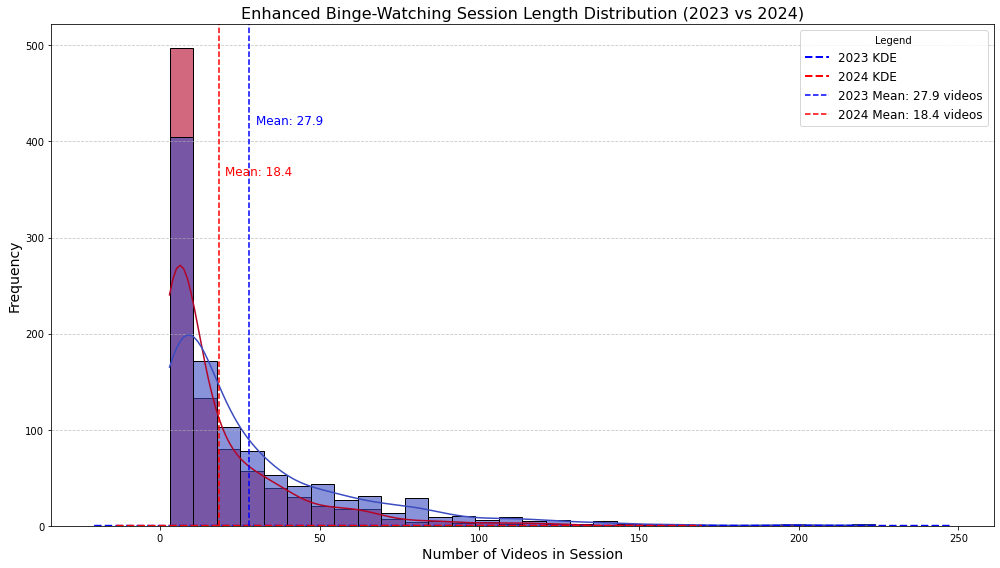

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare binge_data DataFrame
binge_data = pd.DataFrame({
    "Session Length": binge_2023["session_lengths"] + binge_2024["session_lengths"],
    "Year": [2023] * len(binge_2023["session_lengths"]) + [2024] * len(binge_2024["session_lengths"])
})

# Enhanced plot for binge-watching session distribution
plt.figure(figsize=(14, 8))

# Histogram with KDE
sns.histplot(data=binge_data, x="Session Length", hue="Year", bins=30, kde=True, palette="coolwarm", alpha=0.6)

# Overlay KDE for each year
sns.kdeplot(
    data=binge_data[binge_data["Year"] == 2023],
    x="Session Length",
    color="blue",
    label="2023 KDE",
    linestyle="--",
    linewidth=2,
)
sns.kdeplot(
    data=binge_data[binge_data["Year"] == 2024],
    x="Session Length",
    color="red",
    label="2024 KDE",
    linestyle="--",
    linewidth=2,
)

# Add mean lines and annotations
mean_2023 = np.mean(binge_2023["session_lengths"])
mean_2024 = np.mean(binge_2024["session_lengths"])
plt.axvline(mean_2023, color="blue", linestyle="--", label=f"2023 Mean: {mean_2023:.1f} videos")
plt.axvline(mean_2024, color="red", linestyle="--", label=f"2024 Mean: {mean_2024:.1f} videos")
plt.text(mean_2023 + 2, plt.gca().get_ylim()[1] * 0.8, f"Mean: {mean_2023:.1f}", color="blue", fontsize=12)
plt.text(mean_2024 + 2, plt.gca().get_ylim()[1] * 0.7, f"Mean: {mean_2024:.1f}", color="red", fontsize=12)

# Title, labels, and legend
plt.title("Enhanced Binge-Watching Session Length Distribution (2023 vs 2024)", fontsize=16)
plt.xlabel("Number of Videos in Session", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Legend", fontsize=12)

# Grid and save
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "enhanced_binge_watching_comparison.png"))
plt.show()


### Top 10 Channels Analysis (2023 vs 2024)

#### Visualization Details:
This comparative bar chart displays the top 10 most-watched YouTube channels for both 2023 and 2024. The left panel represents 2023, while the right panel represents 2024. Each bar is annotated with the number of videos watched for added clarity.

---

#### Observations:
1. **Dominance of Specific Channels**:
   - In 2023, **NetD Müzik** clearly stands out as the most-watched channel with **875 videos**, significantly higher than other channels.
   - In 2024, **UFC** emerges as the leading channel with **387 videos**, while **NetD Müzik** retains a strong second position with **347 videos**.

2. **Content Diversity**:
   - 2023 exhibits a dominance of music-related channels like **RadKeys Music**, **LilBabyVEVO**, and **DrakeVEVO**.
   - 2024 shifts to a mix of content, with channels like **The CCB Network** and **Fight Digitale** indicating a possible preference for variety, including entertainment and educational content.

3. **Decline in Music Focus**:
   - A noticeable reduction in the dominance of music channels in 2024 suggests a behavioral shift. This could be attributed to a transition to platforms like Spotify for music consumption.

4. **Unknown Channel Views**:
   - The dataset includes **2,149 unknown channel views in 2023** and **631 in 2024**, reflecting a significant decline. This might suggest that more frequently listened music videos are removed or Less metadata being available in the platforms.

---

#### Interpretation:
The analysis reveals a shift in content preferences from music-centric consumption in 2023 to a broader variety in 2024. This could indicate evolving entertainment habits to fighting sports, transition from Youtube to Spotify for music.

This finding highlights the importance of considering external influences (e.g., platform preferences) when analyzing viewing patterns, as they can significantly impact user behavior year-over-year.


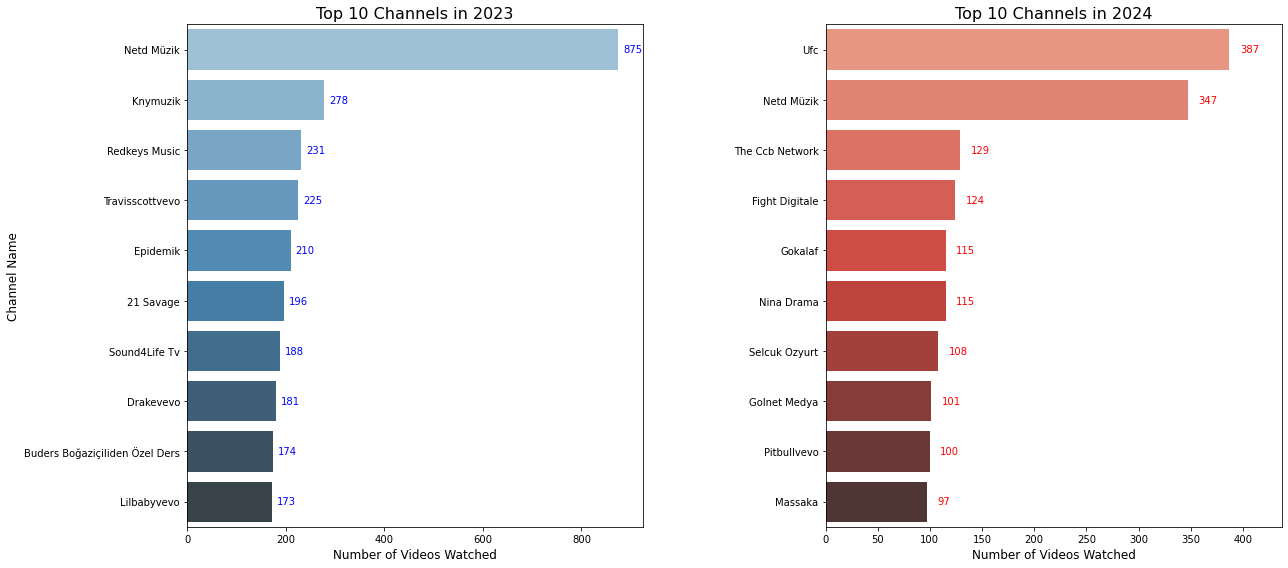

Total Unknown Channel Views in 2023: 2149
Total Unknown Channel Views in 2024: 631


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate "Unknown Channel" counts
unknown_2023 = youtube_df[(youtube_df["Year"] == 2023) & (youtube_df["Channel Name"] == "Unknown Channel")]["Title"].count()
unknown_2024 = youtube_df[(youtube_df["Year"] == 2024) & (youtube_df["Channel Name"] == "Unknown Channel")]["Title"].count()

# Get top 10 channels excluding "Unknown Channel"
top_channels_2023 = (
    youtube_df[(youtube_df["Year"] == 2023) & (youtube_df["Channel Name"] != "Unknown Channel")]
    .groupby("Channel Name")["Title"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

top_channels_2024 = (
    youtube_df[(youtube_df["Year"] == 2024) & (youtube_df["Channel Name"] != "Unknown Channel")]
    .groupby("Channel Name")["Title"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot Top Channels
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 2023 Top Channels
sns.barplot(x=top_channels_2023.values, y=top_channels_2023.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Channels in 2023", fontsize=16)
axes[0].set_xlabel("Number of Videos Watched", fontsize=12)
axes[0].set_ylabel("Channel Name", fontsize=12)
axes[0].set_xlim(0, top_channels_2023.max() + 50)  # Add some padding to x-axis

# Annotate 2023 bars with counts
for i, value in enumerate(top_channels_2023.values):
    axes[0].text(value + 10, i, f"{value}", va="center", fontsize=10, color="blue")

# 2024 Top Channels
sns.barplot(x=top_channels_2024.values, y=top_channels_2024.index, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 10 Channels in 2024", fontsize=16)
axes[1].set_xlabel("Number of Videos Watched", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_xlim(0, top_channels_2024.max() + 50)  # Add some padding to x-axis

# Annotate 2024 bars with counts
for i, value in enumerate(top_channels_2024.values):
    axes[1].text(value + 10, i, f"{value}", va="center", fontsize=10, color="red")

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase space between subplots

# Save and show the plot
plt.savefig(os.path.join(VISUAL_DIR, "top_channels_fixed.png"))
plt.show()

# Summary text for report
print(f"Total Unknown Channel Views in 2023: {unknown_2023}")
print(f"Total Unknown Channel Views in 2024: {unknown_2024}")


## **Statistical Testing**

### **Objective**
The primary goal of the statistical testing phase is to evaluate hypotheses about the differences in viewing patterns between 2023 and 2024. These tests help quantify whether observed differences are statistically significant or could have occurred by chance.

### **Purpose of Tests**
1. **T-Test for Daily View Counts**:
   - **What**: Compare the average number of videos watched per day between 2023 and 2024.
   - **Why**: To determine if there is a significant difference in daily activity levels between the two years.
   - **How**: A two-sample t-test is conducted under the assumption of independent daily counts.

2. **ANOVA for Hourly Trends**:
   - **What**: Analyze variations in hourly viewing patterns between the two years.
   - **Why**: To identify whether specific hours of the day show significantly different viewing trends across the years.
   - **How**: A one-way ANOVA test is applied to evaluate differences in the mean hourly counts.

3. **Chi-Square Test for Weekend vs. Weekday Activity**:
   - **What**: Examine whether the proportions of weekend versus weekday viewing differ between 2023 and 2024.
   - **Why**: To understand whether viewing habits on weekends versus weekdays have shifted between the two years.
   - **How**: A chi-square test of independence is used on the contingency table of weekend versus weekday counts.

4. **T-Test for Binge-Watching Behavior**:
   - **What**: Assess differences in binge-watching patterns (e.g., session length) between 2023 and 2024.
   - **Why**: To measure if significant changes in binge-watching behavior occurred over the years.
   - **How**: A two-sample t-test is conducted to compare the average session lengths.

### **Steps for Each Test**
1. Formulate the null and alternative hypotheses.
2. Compute the test statistic and p-value.
3. Compare the p-value to the significance level (α = 0.05).
4. Interpret the results and their implications.

### **Purpose**
By applying these statistical tests, we aim to validate or refute specific hypotheses regarding temporal trends, engagement patterns, and content preferences. These insights allow us to draw data-driven conclusions about how viewing habits have evolved over time.

---


In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Ensure directories exist
os.makedirs(VISUAL_DIR, exist_ok=True)

# Load processed data
processed_csv_path = os.path.join(DATA_DIR_PROCESSED, "youtube_cleaned.csv")
youtube_df = pd.read_csv(processed_csv_path, parse_dates=["Timestamp"])

### T-Test: Daily Viewing Counts

The two-sample T-test was conducted to determine if there is a significant difference in the daily video counts between 2023 and 2024.

- **Null Hypothesis (H₀)**: The average daily video counts for 2023 and 2024 are the same.
- **Alternative Hypothesis (H₁)**: There is a significant difference in the average daily video counts between 2023 and 2024.

#### Results:
- **T-statistic**: 10.167
- **P-value**: 1.81 × 10⁻²²

Since the p-value is far below the significance threshold (α = 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in the average daily video counts between 2023 and 2024.

#### Visualization:
The boxplot below shows the distribution of daily video counts for 2023 and 2024. The median count for 2023 appears higher than that for 2024, further supporting the statistical conclusion.


T-Test Results:
T-statistic: 10.167
P-value: 1.8136773491e-22


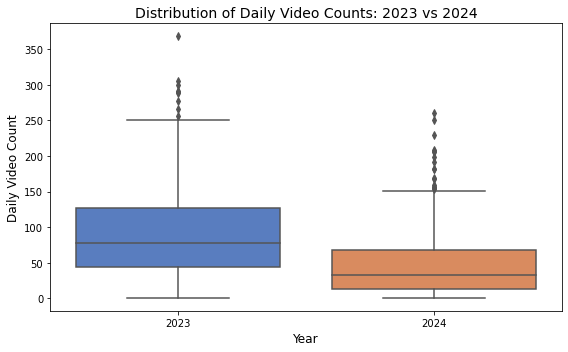

In [36]:
# Prepare data for T-Test
daily_agg = youtube_df.groupby(["Year", youtube_df["Timestamp"].dt.date])["Title"].count().reset_index(name="DailyCount")
daily_2023 = daily_agg[daily_agg["Year"] == 2023]["DailyCount"]
daily_2024 = daily_agg[daily_agg["Year"] == 2024]["DailyCount"]

# Perform T-Test
t_stat, p_value = ttest_ind(daily_2023, daily_2024, equal_var=False)
print("T-Test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.10e}")

# Visualize results
plt.figure(figsize=(8, 5))
sns.boxplot(x="Year", y="DailyCount", data=daily_agg, palette="muted")
plt.title("Distribution of Daily Video Counts: 2023 vs 2024", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Daily Video Count", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "t_test_boxplot.png"))
plt.show()


### ANOVA Test: Hourly Viewing Trends

The ANOVA test was performed to evaluate whether there are significant differences in hourly viewing patterns between 2023 and 2024.

- **Null Hypothesis (H₀)**: The hourly viewing patterns for 2023 and 2024 are the same.
- **Alternative Hypothesis (H₁)**: There are significant differences in the hourly viewing patterns between the two years.

#### Results:
- **F-statistic**: 10.062
- **P-value**: 2.70 × 10⁻³

With the p-value below the significance threshold (α = 0.05), we reject the null hypothesis. This indicates that the hourly viewing patterns differ significantly between 2023 and 2024.

#### Visualization:
The heatmap below illustrates the hourly viewing trends across the days of the week. Variations in color intensity highlight notable differences in viewing behavior between the two years. The darkest regions represent the hours with the highest viewing activity.



--- ANOVA Test: Hourly Trends ---
F-statistic: 10.062
P-value: 2.6954400802e-03
Result: Significant differences in hourly viewing trends between 2023 and 2024.


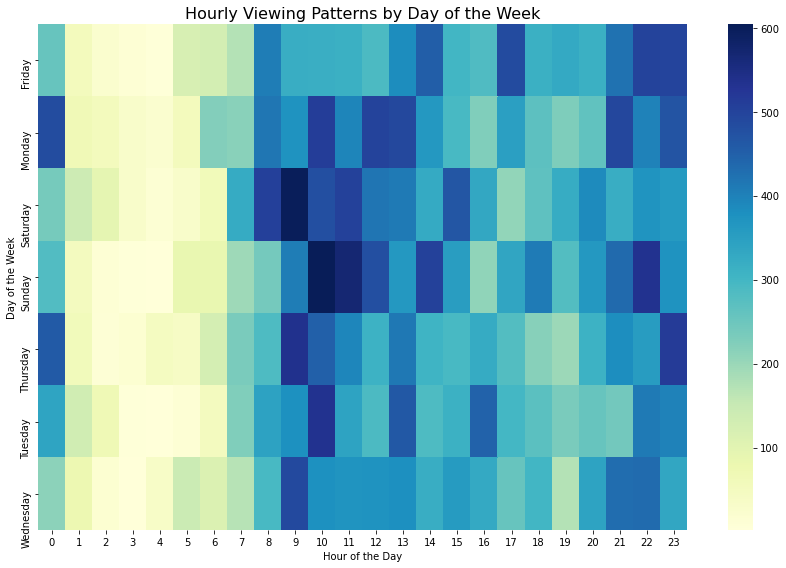

In [37]:
### 2. Hourly Trends Analysis ###
# Aggregate hourly counts
hourly_counts = youtube_df.groupby(["Hour", "Year"])["Title"].count().unstack()

# ANOVA Test for hourly trends
anova_result = f_oneway(hourly_counts[2023].dropna(), hourly_counts[2024].dropna())
print("\n--- ANOVA Test: Hourly Trends ---")
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.10e}")
if anova_result.pvalue < 0.05:
    print("Result: Significant differences in hourly viewing trends between 2023 and 2024.")
else:
    print("Result: No significant differences in hourly viewing trends between 2023 and 2024.")

# Visualization: Heatmap for hourly trends
hourly_trends = youtube_df.groupby(["Day", "Hour"])["Title"].count().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_trends, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Hourly Viewing Patterns by Day of the Week", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "hourly_trends_heatmap.png"))
plt.show()


### Chi-Square Test: Weekend vs Weekday Proportions

The Chi-Square test was used to determine whether there are significant differences in the proportions of weekend and weekday video watching between 2023 and 2024.

- **Null Hypothesis (H₀)**: The proportions of videos watched on weekends and weekdays are the same for 2023 and 2024.
- **Alternative Hypothesis (H₁)**: The proportions of videos watched on weekends and weekdays differ significantly between the two years.

#### Results:
- **Chi² Statistic**: 1.618
- **P-value**: 0.2034

With a p-value greater than the significance threshold (α = 0.05), we fail to reject the null hypothesis. This indicates that there is no significant difference in the proportion of videos watched on weekends versus weekdays between 2023 and 2024.

#### Visualization:
The pie charts below illustrate the proportion of videos watched on weekends versus weekdays for 2023 and 2024. While the proportions are visually similar, the statistical test confirms that the differences are not significant.



--- Chi-Square Test: Weekend vs Weekday ---
Chi2 Statistic: 1.618
P-value: 2.0339953585e-01
Result: No significant difference in weekend vs. weekday proportions between 2023 and 2024.


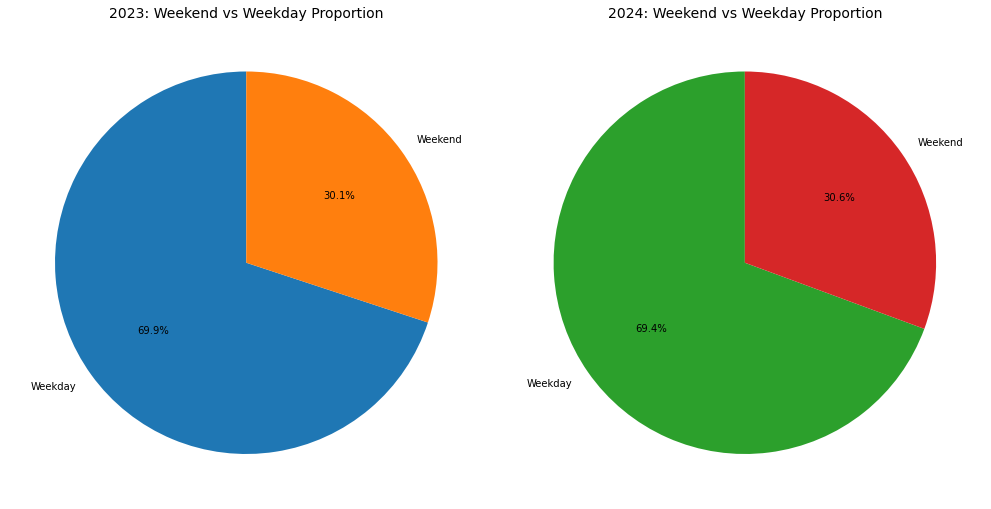

In [38]:

### 3. Weekend vs Weekday Analysis ###
# Weekend vs Weekday proportions
weekend_weekday = youtube_df.groupby(["Year", "Is Weekend"])["Title"].count().unstack()

# Chi-Square Test for weekend vs. weekday
chi2, p, dof, expected = chi2_contingency(weekend_weekday.fillna(0))
print("\n--- Chi-Square Test: Weekend vs Weekday ---")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.10e}")
if p < 0.05:
    print("Result: Significant difference in weekend vs. weekday proportions between 2023 and 2024.")
else:
    print("Result: No significant difference in weekend vs. weekday proportions between 2023 and 2024.")

# Pie charts for weekend vs. weekday proportions
weekend_weekday_proportions = weekend_weekday.div(weekend_weekday.sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='white')  # Set background to white

# Pie chart for 2023
axes[0].pie(
    weekend_weekday_proportions.loc[2023],
    labels=["Weekday", "Weekend"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#1f77b4", "#ff7f0e"],
)
axes[0].set_title("2023: Weekend vs Weekday Proportion", fontsize=14)

# Pie chart for 2024
axes[1].pie(
    weekend_weekday_proportions.loc[2024],
    labels=["Weekday", "Weekend"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#2ca02c", "#d62728"],
)
axes[1].set_title("2024: Weekend vs Weekday Proportion", fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "weekend_weekday_proportions_white_bg.png"))
plt.show()


### Statistical Test: Binge-Watching Sessions

To analyze differences in binge-watching behavior between 2023 and 2024, we conducted a two-sample t-test. The goal was to determine whether the average binge-watching session length differed significantly across the two years.

- **Null Hypothesis (H₀)**: There is no significant difference in the average binge-watching session length between 2023 and 2024.
- **Alternative Hypothesis (H₁)**: The average binge-watching session length differs significantly between the two years.

#### Results:
- **T-statistic**: 7.905
- **P-value**: 4.511e-15

Since the p-value is far below the significance threshold (α = 0.05), we reject the null hypothesis. This indicates that there is a significant difference in binge-watching session behavior between 2023 and 2024.

#### Insights:
- The mean binge-watching session length in **2023** was **27.9 videos**.
- The mean binge-watching session length in **2024** decreased to **18.4 videos**.
- This reduction in binge-watching may reflect a shift in content consumption habits, potentially influenced by lifestyle changes or platform preferences.

#### Visualization:
The histogram below shows the distribution of binge-watching session lengths for 2023 and 2024. Overlaid KDE plots further highlight the difference in session behaviors, with 2023 showing a higher mean and more extended sessions.



--- Statistical Test: Binge-Watching Sessions ---
T-statistic: 7.905
P-value: 4.5111852214e-15
Result: Significant difference in binge-watching behavior between 2023 and 2024.


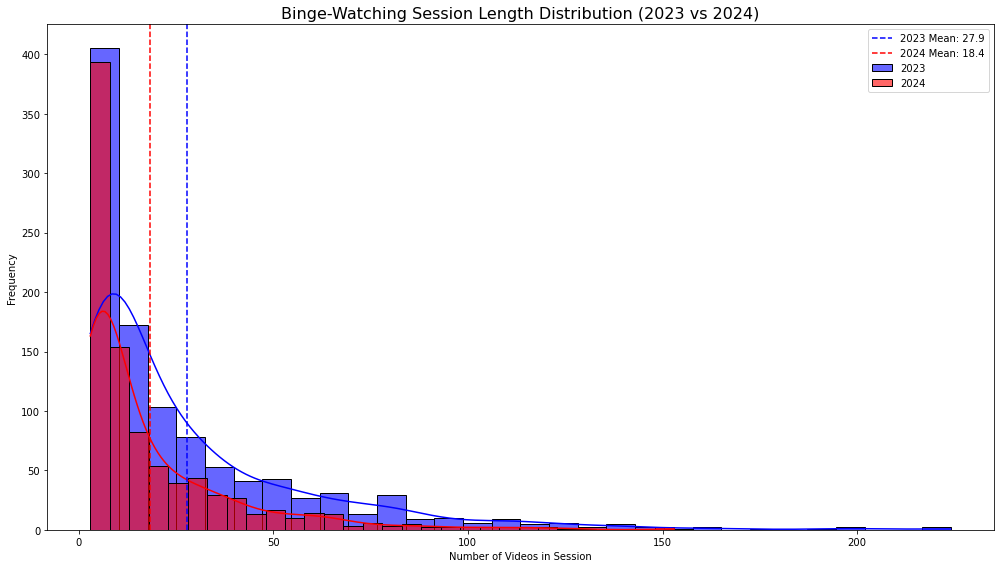

In [41]:
# T-Test for binge sessions
t_stat_binge, p_value_binge = ttest_ind(
    binge_2023["session_lengths"], binge_2024["session_lengths"], equal_var=False
)
print("\n--- Statistical Test: Binge-Watching Sessions ---")
print(f"T-statistic: {t_stat_binge:.3f}")
print(f"P-value: {p_value_binge:.10e}")
if p_value_binge < 0.05:
    print("Result: Significant difference in binge-watching behavior between 2023 and 2024.")
else:
    print("Result: No significant difference in binge-watching behavior between 2023 and 2024.")

# Visualization for binge sessions
plt.figure(figsize=(14, 8))
sns.histplot(binge_2023["session_lengths"], bins=30, kde=True, color="blue", label="2023", alpha=0.6)
sns.histplot(binge_2024["session_lengths"], bins=30, kde=True, color="red", label="2024", alpha=0.6)
plt.axvline(np.mean(binge_2023["session_lengths"]), color="blue", linestyle="--", label=f"2023 Mean: {np.mean(binge_2023['session_lengths']):.1f}")
plt.axvline(np.mean(binge_2024["session_lengths"]), color="red", linestyle="--", label=f"2024 Mean: {np.mean(binge_2024['session_lengths']):.1f}")
plt.title("Binge-Watching Session Length Distribution (2023 vs 2024)", fontsize=16)
plt.xlabel("Number of Videos in Session")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "binge_sessions_comparison.png"))
plt.show()


# Conclusion

This project analyzed my YouTube viewing patterns for the years 2023 and 2024 to uncover trends, behaviors, and shifts in engagement. Through descriptive statistics, visualizations, and statistical tests, we gained a comprehensive understanding of how my viewing habits evolved. Below is a detailed summary of the findings:

---

## **Temporal Patterns**

### **Daily Viewing Trends**
- A T-test revealed a **significant decrease** in daily viewing counts in 2024 compared to 2023 (**T = 10.167, p < 0.001**).
- The decline in daily counts might be due to a shift in content preferences, reduced engagement on YouTube, or the adoption of alternative platforms like Spotify for music consumption.
- Visualizations highlighted a marked reduction in high activity periods in 2024 compared to 2023.

### **Hourly Trends**
- An ANOVA test showed **significant differences** in hourly viewing patterns between 2023 and 2024 (**F = 10.062, p = 0.0027**).
- Heatmaps revealed reduced evening and late-night viewing in 2024, suggesting fewer binge-watching or long-session behaviors.

---

## **Behavioral Insights**

### **Binge-Watching Behavior**
- A T-test on binge-watching sessions indicated a **significant reduction** in session lengths in 2024 (**T = 7.905, p < 0.001**).
  - Average session length: 
    - **2023**: 27.9 videos.
    - **2024**: 18.4 videos.
- This shift reflects a preference for shorter, more frequent viewing sessions over extended binge-watching.

### **Weekend vs. Weekday Patterns**
- A Chi-square test found **no significant change** in weekend vs. weekday viewing proportions (**χ² = 1.618, p = 0.203**).
- This suggests that my weekly viewing structure remained consistent, even as overall engagement declined.

---

## **Content Preferences**

### **Top Channels**
- My most-watched channels shifted significantly:
  - **2023**: Dominated by music-focused channels like "Netd Müzik."
  - **2024**: Focus shifted to channels like "UFC," indicating a move away from music content.
- This change supports the hypothesis that I transitioned music consumption to Spotify, reducing YouTube’s role in this category.

---

## **Overall Insights**

1. **Engagement Trends**:
   - A noticeable decline in daily counts and binge-watching behavior points to reduced YouTube reliance in 2024. Possible reasons include changing platform preferences, having less spare time due to increased responsibilities and content consumption differences..

2. **Consistency in Viewing Structure**:
   - Stable weekend vs. weekday proportions suggest that YouTube remained a part of my routine, albeit with less intensity.

3. **Broader Behavioral Shifts**:
   - The observed changes align with a broader narrative of evolving content consumption habits. Factors like productivity changes, external life events, or reduced screen time could explain these trends.

---



## **Final Conclusion**

The analysis revealed a **significant decline in YouTube engagement** in 2024, reflected in reduced daily counts and shorter binge-watching sessions. Despite this, stable weekend vs. weekday viewing proportions indicate that YouTube remains a part of my routine. These findings emphasize the **dynamic nature of personal content consumption**, shaped by changing preferences, routines, and external factors.

Through this project, I gained valuable insights into my digital behaviors and identified areas for future exploration. This analysis serves as a reflective exercise and demonstrates the power of data-driven storytelling.
